# Preprocessing PLUTO dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 40

In [3]:
bronx = pd.read_csv(f'PLUTO_for_WEB\BX_18v1.csv')
bronx

C:\Users\azuka\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthCenterDistrict,HealthArea,SanitBoro,SanitDistrict,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,...,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BX,2260,1,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,122 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,...,6.02,5.0,6.5,2,2022600001,0,19,1005957.0,232162.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
1,BX,2260,4,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,126 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,...,6.02,5.0,6.5,2,2022600004,0,19,1006076.0,232156.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
2,BX,2260,10,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,138 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,...,6.02,5.0,6.5,2,2022600010,0,19,1006187.0,232036.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
3,BX,2260,17,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,144 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,...,6.02,5.0,6.5,2,2022600017,0,19,1006299.0,232033.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
4,BX,2260,18,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,148 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,...,6.02,5.0,6.5,2,2022600018,0,19,1006363.0,232040.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89849,BX,9999,100,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,0.0,2,2099990100,0,0,NaN,NaN,3d,NaN,200 000,2.0,NaN,NaN,NaN,3,NaN,NaN,18V1
89850,BX,9999,150,205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C4-4D,NaN,NaN,...,6.02,3.4,6.5,2,2099990150,0,0,NaN,NaN,3c,NaN,200 000,2.0,NaN,NaN,NaN,3,NaN,NaN,18V1
89851,BX,9999,200,205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,0.0,2,2099990200,0,0,NaN,NaN,3c,NaN,200 000,2.0,NaN,NaN,NaN,3,NaN,NaN,18V1
89852,BX,9999,8900,209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,0.0,2,2099998900,0,0,NaN,NaN,6c,NaN,200 000,2.0,NaN,NaN,NaN,3,NaN,NaN,18V1


In [4]:
def check_values(df):
    col_desc = []
    data = {
        'features': [col for col in df.columns],
        'data_type': [df[col].dtype for col in df.columns],
        'nan_total': [df[col].isna().sum() for col in df.columns],
        'nan_pct': [round(df[col].isna().sum()/len(df)*100,2) for col in df.columns],
        'unique': [df[col].nunique() for col in df.columns],
        'values_ex': [df[col].drop_duplicates().sample(df[col].nunique()).values if df[col].nunique() <= 5 else df[col].drop_duplicates().sample(2).values for col in df.columns]
    }
    return pd.DataFrame(data)

### Check the null value

In [5]:
check_values(bronx)

,features,data_type,nan_total,nan_pct,unique,values_ex
0,Borough,object,0,0.00,1,[BX]
1,Block,int64,0,0.00,3032,"[3566, 3915]"
2,Lot,int64,0,0.00,1960,"[268, 1276]"
3,CD,int64,0,0.00,17,"[111, 203]"
4,CT2010,float64,407,0.45,339,"[27.02, 27.01]"
5,CB2010,float64,2512,2.80,212,"[3033.0, 5010.0]"
6,SchoolDist,float64,159,0.18,6,"[9.0, 11.0]"
7,Council,float64,205,0.23,11,"[nan, 10.0]"
8,ZipCode,float64,329,0.37,26,"[10454.0, 10464.0]"
9,FireComp,object,286,0.32,60,"[E066, E045]"


In [6]:
# brooklyn = pd.read_csv(f'PLUTO_for_WEB\BK_18v1.csv')
# manhattan = pd.read_csv(f'PLUTO_for_WEB\MN_18v1.csv')
# queens = pd.read_csv(f'PLUTO_for_WEB\QN_18v1.csv')
# staten = pd.read_csv(f'PLUTO_for_WEB\SI_18v1.csv')

In [7]:
# pluto = pd.concat([bronx, brooklyn, manhattan, queens, staten], ignore_index=True)
# print(pluto.shape)
# pluto.sample(n=20)

### Clean the PLUTO database with high NaN value

In [8]:
%%time
pluto = bronx.copy()
check_values(pluto)

Wall time: 4.69 s


,features,data_type,nan_total,nan_pct,unique,values_ex
0,Borough,object,0,0.00,1,[BX]
1,Block,int64,0,0.00,3032,"[3818, 3973]"
2,Lot,int64,0,0.00,1960,"[3972, 1482]"
3,CD,int64,0,0.00,17,"[206, 211]"
4,CT2010,float64,407,0.45,339,"[119.0, 130.0]"
5,CB2010,float64,2512,2.80,212,"[3038.0, 1.0]"
6,SchoolDist,float64,159,0.18,6,"[11.0, 7.0]"
7,Council,float64,205,0.23,11,"[15.0, nan]"
8,ZipCode,float64,329,0.37,26,"[10473.0, 10463.0]"
9,FireComp,object,286,0.32,60,"[nan, E071]"


In [9]:
df_pluto = pluto.copy()
df_pluto = df_pluto.dropna(thresh = len(df_pluto)*0.5, axis=1)
for col in df_pluto.columns:
    print(col)
len(df_pluto.columns)

Borough
Block
Lot
CD
CT2010
CB2010
SchoolDist
Council
ZipCode
FireComp
PolicePrct
HealthCenterDistrict
HealthArea
SanitBoro
SanitDistrict
SanitSub
Address
ZoneDist1
SplitZone
BldgClass
LandUse
Easements
OwnerName
LotArea
BldgArea
ComArea
ResArea
OfficeArea
RetailArea
GarageArea
StrgeArea
FactryArea
OtherArea
AreaSource
NumBldgs
NumFloors
UnitsRes
UnitsTotal
LotFront
LotDepth
BldgFront
BldgDepth
ProxCode
IrrLotCode
LotType
BsmtCode
AssessLand
AssessTot
ExemptLand
ExemptTot
YearBuilt
YearAlter1
YearAlter2
BuiltFAR
ResidFAR
CommFAR
FacilFAR
BoroCode
BBL
CondoNo
Tract2010
XCoord
YCoord
ZoneMap
Sanborn
TaxMap
APPBBL
PLUTOMapID
Version


69

# Choosing columns to be dropped

PLUTO database contains extensive land use and geographic data at the tax lot level. Generally, the columns contain information of a tax lot for documentation purposes  and not necessarily the building/lot characteristics. Thus, it is important to choose the appropriate column first using the provided data dictionary.

The short description for each column then was compiled into an excel file. (full description: [download here](https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page))

In [10]:
col_desc = pd.read_excel('pluto_cols.xlsx')
col_desc

,column,desc
0,Borough,The borough that the tax lot is located in. Th...
1,Block,The tax block that the tax lot is located in. ...
2,Lot,The number of the tax lot. This field contains...
3,CD,The community district (CD) or joint interest ...
4,CT2010,The 2010 census tract that the tax lot is loca...
5,CB2010,The 2010 census block that the tax lot is loca...
6,SchoolDist,The community school district that the tax lot...
7,Council,The city council district that the tax lot is ...
8,ZipCode,The zip code that the tax lot is located in.
9,FireComp,The fire company that services the tax lot.


In [11]:
desc_dict = dict(zip(col_desc.column, col_desc.desc))
desc_dict

{'Borough': 'The borough that the tax lot is located in. This field contains a two character borough code.',
 'Block': 'The tax block that the tax lot is located in. This field contains a one to five digit tax block number which is preceded with leading blanks when the tax block is less than five digits. Each tax block is unique within a borough (see BOROUGH).',
 'Lot': 'The number of the tax lot. This field contains a one to four digit tax lot number which is preceded with leading blanks when the tax lot is less than four digits. Each tax lot is unique within a tax block (see TAX BLOCK).',
 'CD': 'The community district (CD) or joint interest area (JIA) that the tax lot is located in, or partially located in.',
 'CT2010': 'The 2010 census tract that the tax lot is located in.',
 'CB2010': 'The 2010 census block that the tax lot is located in.',
 'SchoolDist': 'The community school district that the tax lot is located in.',
 'Council': 'The city council district that the tax lot is loc

## Drop column

### column that already dropped

In [12]:
for i in set(pluto.columns) - set(df_pluto.columns):
    print(i)

Overlay1
ZoneDist4
LtdHeight
EDesigNum
OwnerType
Ext
Overlay2
APPDate
SPDist1
PFIRM15_FLAG
ZMCode
FIRM07_FLAG
SPDist2
HistDist
SPDist3
ZoneDist2
ZoneDist3
Landmark


### columns related to zoning of the lot -> drop
keep only `ZipCode` and `Address` for key value

In [13]:
drop_col1 = '''
Block
Lot
CD
CT2010
CB2010
SchoolDist
Council
FireComp
PolicePrct
HealthCenterDistrict
HealthArea
SanitBoro
SanitDistrict
SanitSub
ZoneDist1
SplitZone
BoroCode
BBL
CondoNo
Tract2010
XCoord
YCoord
ZoneMap
Sanborn
TaxMap
APPBBL
PLUTOMapID
Version
'''

In [14]:
for col in drop_col1.split():
    print(f'{col} ({df_pluto[col].dtype}): {df_pluto[col].nunique()}')

Block (int64): 3032
Lot (int64): 1960
CD (int64): 17
CT2010 (float64): 339
CB2010 (float64): 212
SchoolDist (float64): 6
Council (float64): 11
FireComp (object): 60
PolicePrct (float64): 13
HealthCenterDistrict (float64): 7
HealthArea (float64): 65
SanitBoro (float64): 5
SanitDistrict (float64): 14
SanitSub (object): 22
ZoneDist1 (object): 66
SplitZone (object): 2
BoroCode (int64): 1
BBL (int64): 89854
CondoNo (int64): 203
Tract2010 (int64): 340
XCoord (float64): 29660
YCoord (float64): 33050
ZoneMap (object): 22
Sanborn (object): 1128
TaxMap (float64): 92
APPBBL (float64): 3965
PLUTOMapID (int64): 4
Version (object): 1


### columns related to the building itself

1. not related to building characteristics (tax, ownership, etc) (drop all)

In [15]:
drop_col3 = '''
Easements
OwnerName
AreaSource
ProxCode
IrrLotCode
ExemptLand
ExemptTot
'''

In [16]:
for col in drop_col3.split():
    print(f'{col} ({df_pluto[col].dtype}): {df_pluto[col].nunique()}')

Easements (int64): 8
OwnerName (object): 77013
AreaSource (int64): 5
ProxCode (float64): 4
IrrLotCode (object): 2
ExemptLand (int64): 5588
ExemptTot (int64): 8933


2. related to building characteristics (default: keep)

check further if there are columns that can be dropped (redundant)

In [17]:
drop_col2 = '''
BldgClass
LandUse
LotArea
BldgArea
ComArea
ResArea
OfficeArea
RetailArea
GarageArea
StrgeArea
FactryArea
OtherArea
NumBldgs
NumFloors
UnitsRes
UnitsTotal
LotFront
LotDepth
BldgFront
BldgDepth
LotType
BsmtCode
AssessLand
AssessTot
YearBuilt
YearAlter1
YearAlter2
BuiltFAR
ResidFAR
CommFAR
FacilFAR
'''

In [18]:
print(len(drop_col2.split()))
for col in drop_col2.split():
    print(f'{col} ({df_pluto[col].dtype}): {df_pluto[col].nunique()}')

31
BldgClass (object): 182
LandUse (float64): 11
LotArea (int64): 12063
BldgArea (int64): 11474
ComArea (int64): 5124
ResArea (int64): 8775
OfficeArea (int64): 1495
RetailArea (int64): 2336
GarageArea (int64): 903
StrgeArea (int64): 618
FactryArea (int64): 596
OtherArea (int64): 1683
NumBldgs (int64): 58
NumFloors (float64): 47
UnitsRes (int64): 347
UnitsTotal (int64): 344
LotFront (float64): 7236
LotDepth (float64): 7725
BldgFront (float64): 2408
BldgDepth (float64): 2176
LotType (float64): 10
BsmtCode (float64): 6
AssessLand (int64): 16978
AssessTot (int64): 16302
YearBuilt (int64): 146
YearAlter1 (int64): 109
YearAlter2 (int64): 43
BuiltFAR (float64): 780
ResidFAR (float64): 22
CommFAR (float64): 11
FacilFAR (float64): 14


drop **BldgClass** column (too many unique values)

In [19]:
drop_col2_group = '''
BldgClass
LotType
BsmtCode
'''

for col in drop_col2_group.split():
    print(col)
    print(df_pluto[col].unique())
    print('\n')

BldgClass
['Z9' 'G5' 'F5' 'C1' 'C7' 'G7' 'F9' 'V9' 'U7' 'E9' 'V1' 'U9' 'E1' 'G1'
 'H9' 'G4' 'GW' 'C4' 'G9' 'W8' 'D1' 'B2' 'D5' 'D7' 'Q9' 'M1' 'K4' 'K1'
 'K2' 'A5' 'S3' 'C0' 'V0' 'W1' 'Z3' 'Q2' 'S5' 'S9' 'B3' 'D3' 'P5' 'D6'
 'S2' 'B1' 'Y3' 'U8' 'K5' 'Q1' 'E7' 'C3' 'F4' 'O5' 'B9' 'Q0' 'C5' 'Z0'
 'S4' 'A9' nan 'Q6' 'M9' 'M4' 'C9' 'I7' 'I1' 'W9' 'S1' 'W3' 'W2' 'C6' 'O2'
 'U0' 'O7' 'HB' 'L8' 'G6' 'RC' 'D9' 'RM' 'A1' 'G2' 'I5' 'Y1' 'S0' 'O1'
 'O3' 'O6' 'Y2' 'P8' 'C2' 'N9' 'T2' 'O9' 'K7' 'H3' 'K9' 'V8' 'U6' 'L9'
 'K3' 'U4' 'F1' 'O8' 'W6' 'W5' 'W4' 'U2' 'P9' 'H2' 'J1' 'K6' 'M3' 'R3'
 'RR' 'G8' 'P1' 'GU' 'N2' 'G0' 'H4' 'Z7' 'I6' 'V5' 'I4' 'I9' 'D4' 'Z1'
 'D8' 'P7' 'P3' 'V3' 'Z2' 'Y8' 'A2' 'R2' 'F2' 'U1' 'T9' 'E2' 'F8' 'J6'
 'V2' 'R1' 'HR' 'H6' 'V4' 'G3' 'Q7' 'Y6' 'Y9' 'A7' 'R6' 'I2' 'RI' 'RK'
 'A3' 'P2' 'Q3' 'R4' 'Z8' 'J3' 'A4' 'Y4' 'N1' 'W7' 'I3' 'M2' 'A6' 'RD'
 'P6' 'V7' 'A0' 'Q8' 'V6' 'RB' 'K8' 'U5' 'N3' 'J8' 'P4' 'A8' 'Q5' 'Z4']


LotType
[ 3.  5.  4.  6.  1.  0.  8. nan  2.  7.  9.]


Bsmt

In [20]:
list(set(drop_col2.split()) - set(['LotType', 'BsmtCode']))

['AssessLand',
 'UnitsTotal',
 'LotDepth',
 'NumBldgs',
 'OfficeArea',
 'GarageArea',
 'LotFront',
 'BldgArea',
 'RetailArea',
 'BldgFront',
 'YearAlter1',
 'UnitsRes',
 'ResArea',
 'AssessTot',
 'LotArea',
 'OtherArea',
 'YearAlter2',
 'ComArea',
 'FacilFAR',
 'BuiltFAR',
 'FactryArea',
 'YearBuilt',
 'LandUse',
 'StrgeArea',
 'NumFloors',
 'BldgDepth',
 'CommFAR',
 'ResidFAR',
 'BldgClass']

In [21]:
area_cols = '''
LotArea
NumBldgs
BldgArea
ComArea
ResArea
OfficeArea
RetailArea
GarageArea
StrgeArea
FactryArea
OtherArea
'''
df_area = pluto[area_cols.split()]
df_area['Total'] = pluto.ComArea + pluto.ResArea + pluto.OtherArea
df_area.head()

<ipython-input-21-8459bf5ea8af>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_area['Total'] = pluto.ComArea + pluto.ResArea + pluto.OtherArea


,LotArea,NumBldgs,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,Total
0,15000,1,0,0,0,0,0,0,0,0,0,0
1,13770,2,752,752,0,272,0,0,480,0,0,752
2,35000,1,39375,39375,0,0,0,0,0,39375,0,39375
3,2500,1,12500,0,12500,0,0,0,0,0,0,12500
4,1875,1,8595,1719,6876,0,1719,0,0,0,0,8595


In [22]:
df_area[df_area.BldgArea != df_area.Total][['BldgArea', 'Total']]

,BldgArea,Total
17,41080,0
36,49300,92275
38,3120,2080
47,3120,2080
49,3120,2080
...,...,...
89829,2556,1984
89832,2560,1816
89842,237021,474042
89843,83366,166732


checking the relationship between the area and FAR

In [23]:
far_cols = '''
BuiltFAR
ResidFAR
CommFAR
FacilFAR
LotArea
NumBldgs
BldgArea
ComArea
ResArea
OfficeArea
RetailArea
GarageArea
StrgeArea
FactryArea
OtherArea
'''
df_area2 = pluto[far_cols.split()]
df_area2['residfar'] = df_area2['ResArea']/df_area2['LotArea']
df_area2['builtfar'] = df_area2['BldgArea']/df_area2['LotArea']
df_area2['commfar'] = df_area2['ComArea']/df_area2['LotArea']
df_area2[['residfar', 'ResidFAR', 'builtfar', 'BuiltFAR', 'commfar', 'CommFAR']]

<ipython-input-23-27e041684b83>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_area2['residfar'] = df_area2['ResArea']/df_area2['LotArea']
<ipython-input-23-27e041684b83>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_area2['builtfar'] = df_area2['BldgArea']/df_area2['LotArea']
<ipython-input-23-27e041684b83>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,residfar,ResidFAR,builtfar,BuiltFAR,commfar,CommFAR
0,0.0000,6.02,0.000000,0.00,0.000000,5.0
1,0.0000,6.02,0.054611,0.05,0.054611,5.0
2,0.0000,6.02,1.125000,1.13,1.125000,5.0
3,5.0000,6.02,5.000000,5.00,0.000000,5.0
4,3.6672,6.02,4.584000,4.58,0.916800,5.0
...,...,...,...,...,...,...
89849,NaN,0.00,NaN,0.00,NaN,0.0
89850,NaN,6.02,NaN,0.00,NaN,3.4
89851,NaN,0.00,NaN,0.00,NaN,0.0
89852,NaN,0.00,NaN,0.00,NaN,0.0


drop rows with missing LotArea and BldgArea

In [24]:
b = df_area2[(df_area2.LotArea == 0) | (df_area2.BldgArea == 0)].index

In [25]:
df_area2.drop(b)[['ResidFAR', 'residfar']].describe()

,ResidFAR,residfar
count,83398.000000,83398.000000
mean,1.681854,0.982919
std,1.287452,1.647089
min,0.000000,0.000000
25%,0.900000,0.457063
50%,1.100000,0.710932
75%,2.430000,1.080000
max,10.000000,259.803839


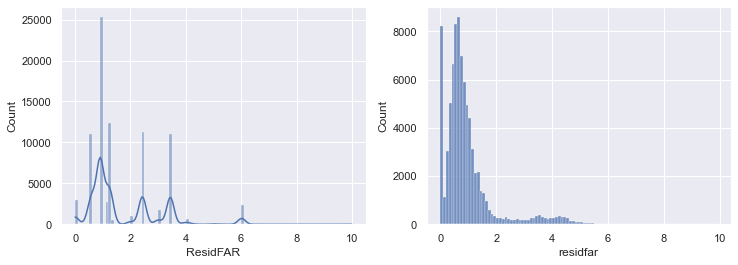

Wall time: 8.52 s


In [26]:
%%time
plt.subplots(1,2, figsize=(12,4))
plt.subplot(121)
sns.histplot(df_area2.drop(b).ResidFAR, bins=np.arange(0,10,.1), kde=True)
plt.subplot(122)
sns.histplot(df_area2.drop(b).residfar, bins=np.arange(0,10,.1))
plt.show()

In [27]:
df_area2.drop(b)[['BuiltFAR', 'builtfar']].describe()

,BuiltFAR,builtfar
count,83398.00000,83398.000000
mean,1.19284,1.192820
std,1.83992,1.839895
min,0.00000,0.000061
25%,0.62000,0.622894
50%,0.90000,0.904110
75%,1.30000,1.297444
max,259.80000,259.803839


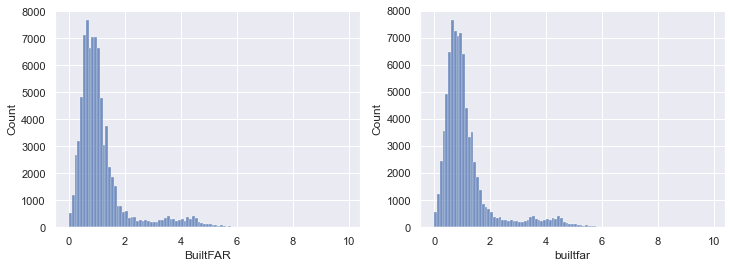

Wall time: 5.24 s


In [28]:
%%time
plt.subplots(1,2, figsize=(12,4))
plt.subplot(121)
sns.histplot(df_area2.drop(b).BuiltFAR, bins=np.arange(0,10,.1))
plt.subplot(122)
sns.histplot(df_area2.drop(b).builtfar, bins=np.arange(0,10,.1))
plt.show()

In [29]:
df_area2.drop(b)[['CommFAR', 'commfar']].describe()

,CommFAR,commfar
count,83398.000000,83398.000000
mean,0.111708,0.130926
std,0.536552,0.571110
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,9.000000,72.060714


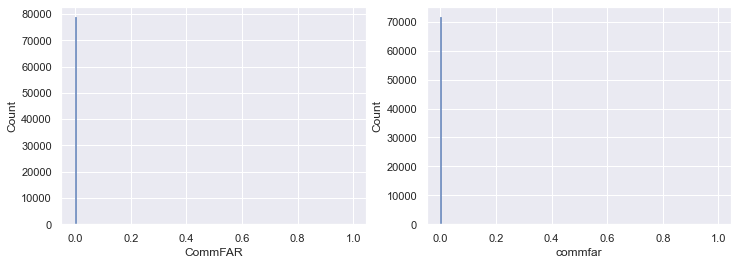

Wall time: 8.13 s


In [30]:
%%time
plt.subplots(1,2, figsize=(12,4))
plt.subplot(121)
sns.histplot(df_area2.drop(b).CommFAR, bins=np.arange(0,1,.005))
plt.subplot(122)
sns.histplot(df_area2.drop(b).commfar, bins=np.arange(0,1,.005))
plt.show()

setelah dicek:
- penjumlahan dari ComArea, ResArea, OfficeArea, RetailArea, GarageArea, StrgeArea, FactryArea, dan OtherArea != BldgArea
- penjumlahan dari ComArea, ResArea, dan OtherArea != BldgArea
- BuiltFAR $\simeq$ BldgArea / LotArea, tapi
- ResidFAR != ResArea / LotArea (beda nilai, beda distribusi)
- CommFAR != ComArea / LotArea (nilai mirip2 tapi kebanyakan bernilai 0 seperti yang dilihat dari distribusinya)

In [31]:
df_year = pluto[['YearBuilt', 'YearAlter1', 'YearAlter2']]
df_year['YearAlter1_2'] = 0
df_year['YearAlter2_2'] = 0
df_year.loc[df_year.YearAlter1 > df_year.YearBuilt, 'YearAlter1_2'] = df_year['YearAlter1'] - df_year['YearBuilt']
df_year.loc[df_year.YearAlter2 > df_year.YearBuilt, 'YearAlter2_2'] = df_year['YearAlter2'] - df_year['YearBuilt']
df_year

<ipython-input-31-cbfa6645fdfe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['YearAlter1_2'] = 0
<ipython-input-31-cbfa6645fdfe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['YearAlter2_2'] = 0
C:\Users\azuka\anaconda3-1\envs\py38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

,YearBuilt,YearAlter1,YearAlter2,YearAlter1_2,YearAlter2_2
0,0,0,0,0,0
1,1931,1994,0,63,0
2,1931,0,0,0,0
3,1931,2001,0,70,0
4,1920,2009,0,89,0
...,...,...,...,...,...
89849,0,0,0,0,0
89850,0,0,0,0,0
89851,0,0,0,0,0
89852,0,0,0,0,0


In [32]:
df_year[df_year.YearAlter2_2 == 0]

,YearBuilt,YearAlter1,YearAlter2,YearAlter1_2,YearAlter2_2
0,0,0,0,0,0
1,1931,1994,0,63,0
2,1931,0,0,0,0
3,1931,2001,0,70,0
4,1920,2009,0,89,0
...,...,...,...,...,...
89849,0,0,0,0,0
89850,0,0,0,0,0
89851,0,0,0,0,0
89852,0,0,0,0,0


kesimpulan: buat kolom baru (YearAlter1 - YearBuilt), drop kolom YearAlter2

In [33]:
df_year.describe()

,YearBuilt,YearAlter1,YearAlter2,YearAlter1_2,YearAlter2_2
count,89854.000000,89854.000000,89854.000000,89854.000000,89854.000000
mean,1805.695150,176.591782,20.207893,5.779197,0.711488
std,499.485278,567.142346,200.230975,22.908744,7.426713
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1920.000000,0.000000,0.000000,0.000000,0.000000
50%,1931.000000,0.000000,0.000000,0.000000,0.000000
75%,1960.000000,0.000000,0.000000,0.000000,0.000000
max,2017.000000,2017.000000,2017.000000,2005.000000,217.000000


In [34]:
pluto[['BldgArea']].describe()

,BldgArea
count,8.985400e+04
mean,8.113609e+03
std,6.520439e+04
min,0.000000e+00
25%,1.598000e+03
50%,2.226000e+03
75%,3.288000e+03
max,1.354011e+07


In [35]:
%%time
sns.histplot(pluto.drop(a).BldgArea, bins=np.arange(0,5000,100))
plt.show()

NameError: name 'a' is not defined

## dropping unneeded columns and rows with missing value

In [36]:
final_drop = '''
BldgClass
UnitsRes
LotFront
LotDepth
YearAlter2
BuiltFAR
ResidFAR
CommFAR
FacilFAR
AssessLand
'''
print(len(final_drop.split()))
final_drop.split()

10


['BldgClass',
 'UnitsRes',
 'LotFront',
 'LotDepth',
 'YearAlter2',
 'BuiltFAR',
 'ResidFAR',
 'CommFAR',
 'FacilFAR',
 'AssessLand']

In [37]:
final_drop = '''
BldgClass
UnitsRes
LotFront
LotDepth
YearAlter2
AssessLand
'''
print(len(final_drop.split()))
final_drop.split()

6


['BldgClass', 'UnitsRes', 'LotFront', 'LotDepth', 'YearAlter2', 'AssessLand']

In [38]:
print(len(drop_col1.split()))
drop_col1.split()

28


['Block',
 'Lot',
 'CD',
 'CT2010',
 'CB2010',
 'SchoolDist',
 'Council',
 'FireComp',
 'PolicePrct',
 'HealthCenterDistrict',
 'HealthArea',
 'SanitBoro',
 'SanitDistrict',
 'SanitSub',
 'ZoneDist1',
 'SplitZone',
 'BoroCode',
 'BBL',
 'CondoNo',
 'Tract2010',
 'XCoord',
 'YCoord',
 'ZoneMap',
 'Sanborn',
 'TaxMap',
 'APPBBL',
 'PLUTOMapID',
 'Version']

In [39]:
print(len(drop_col3.split()))
drop_col3.split()

7


['Easements',
 'OwnerName',
 'AreaSource',
 'ProxCode',
 'IrrLotCode',
 'ExemptLand',
 'ExemptTot']

In [40]:
len(set(final_drop.split() + drop_col1.split() + drop_col3.split()))

41

In [41]:
dropped_cols = list(set(final_drop.split() + drop_col1.split() + drop_col3.split()))
print(df_pluto.shape)
df_pluto.drop(columns=dropped_cols, inplace=True)
df_pluto.shape

(89854, 69)


(89854, 28)

In [42]:
print(len(df_pluto))

89854


In [43]:
print(len(df_pluto))
a = df_pluto[(df_pluto.BldgArea == 0) | (df_pluto.NumBldgs == 0) | (df_pluto.LotArea == 0)].index
df_pluto.drop(index=a, inplace=True)

89854


In [44]:
check_values(df_pluto)

,features,data_type,nan_total,nan_pct,unique,values_ex
0,Borough,object,0,0.00,1,[BX]
1,ZipCode,float64,13,0.02,26,"[10461.0, 10470.0]"
2,Address,object,0,0.00,83132,"[3525 MICKLE AVENUE, 2009 MONTEREY AVENUE]"
3,LandUse,float64,169,0.20,10,"[10.0, 5.0]"
4,LotArea,int64,0,0.00,10698,"[3007, 1541]"
5,BldgArea,int64,0,0.00,11397,"[27690, 28279]"
6,ComArea,int64,0,0.00,5080,"[91764, 9345]"
7,ResArea,int64,0,0.00,8723,"[64084, 20180]"
8,OfficeArea,int64,0,0.00,1486,"[37622, 94200]"
9,RetailArea,int64,0,0.00,2319,"[1344, 15250]"


In [45]:
df_pluto.Address.nunique()

83132

In [46]:
df_pluto['Address'] = df_pluto['Address'].apply(lambda x: ' '.join(x.split()))
df_pluto['Address'].nunique()

83132

In [47]:
df_pluto.dropna(subset=['Address'], inplace=True)
len(df_pluto)

83222

In [48]:
df_pluto.dropna(subset=['LotType', 'BsmtCode','LandUse', 'ZipCode'], inplace=True)

In [49]:
check_values(df_pluto)

,features,data_type,nan_total,nan_pct,unique,values_ex
0,Borough,object,0,0.0,1,[BX]
1,ZipCode,float64,0,0.0,26,"[10463.0, 10467.0]"
2,Address,object,0,0.0,82961,"[1278 GRANT AVENUE, 1135 BOYNTON AVENUE]"
3,LandUse,float64,0,0.0,10,"[7.0, 1.0]"
4,LotArea,int64,0,0.0,10648,"[14209, 1654]"
5,BldgArea,int64,0,0.0,11367,"[57279, 3247]"
6,ComArea,int64,0,0.0,5047,"[41150, 20177]"
7,ResArea,int64,0,0.0,8723,"[60023, 32456]"
8,OfficeArea,int64,0,0.0,1482,"[915, 28818]"
9,RetailArea,int64,0,0.0,2316,"[2627, 1236]"


In [50]:
# df_pluto.to_csv('df_pluto_fixed_cols.csv', index=False)
# print('Finished')

In [51]:
# df_pluto.to_csv('df_pluto_fixed_cols_2.csv', index=False)
# print('Finished')